# Regression Analysis
## Import packages and Data + Data Investigation

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [12]:
# read in student math performance data set
#PC
housing = pd.read_csv('data/boston_housing.csv')
housing.isnull().sum()
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [188]:
hist,bin_edges = np.histogram(housing[['medv']])

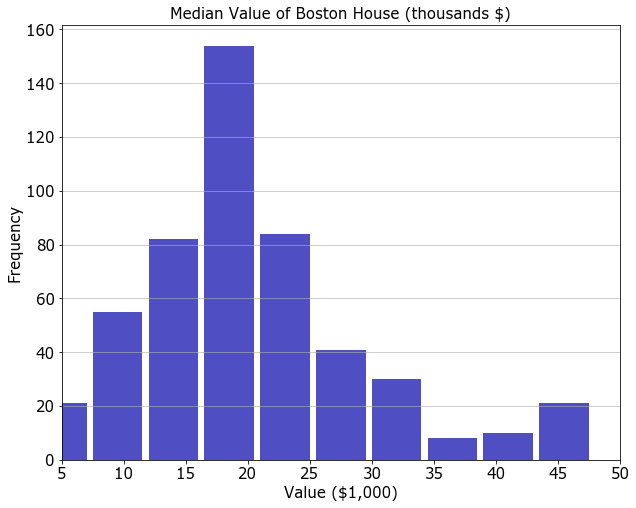

In [194]:
plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 4, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value ($1,000)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Median Value of Boston House (thousands $)',fontsize=15)
plt.show()

In [178]:
housing.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


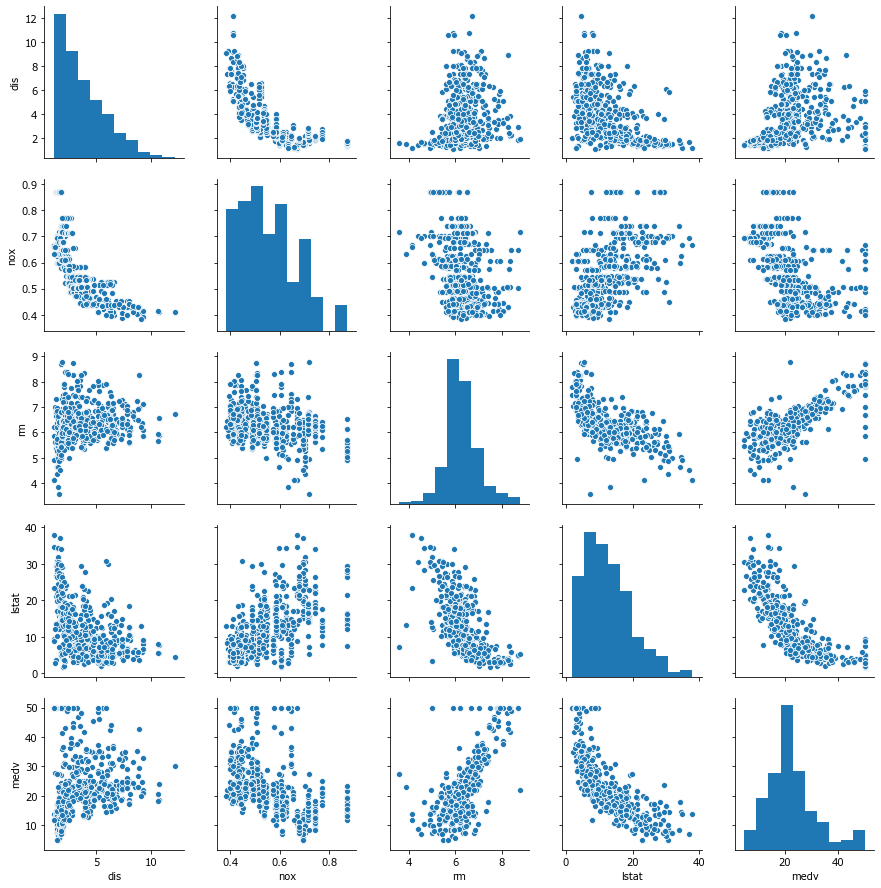

In [177]:
#make plot of ones that seem to have correlation in order to show
sns.pairplot(housing[['dis','nox','rm','lstat','medv']])

In [42]:
# split into X and y
y = housing['medv']
X = housing.drop(['medv'], axis=1)

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
[y_train.size, y_test.size]

[404, 102]

## Linear Regression and Ridge Regression

In [72]:
#do simple linear regression and score against test data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
# score(X_test,y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('coefficient of determination:', regressor.score(X_test,y_test))

Mean Absolute Error: 3.567326018996795
Mean Squared Error: 26.944812249518147
Root Mean Squared Error: 5.190839262539165
coefficient of determination: 0.6859495577055561


In [82]:
#Ridge Regression

#define range code 
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
       

In [144]:
#center and scale the training set
phi_train = X_train
phi_means = X_train.mean(axis=0)
phi_train = phi_train - phi_means.values.squeeze()
z = np.sqrt(np.sum(np.square(phi_train)))
phi_train = phi_train/ z


y_train_ridge = y_train
y_means = y_train.mean(axis=0)
y_train_ridge = y_train_ridge - y_means

In [153]:
#Run Ridge Regression
score=[]
error_df_ridge2=[]
for li in my_range(-13,9,.5):
    l=2**li
    ridge = linear_model.Ridge(alpha = l)
    ridge.fit(phi_train, y_train_ridge)
    score_temp = ridge.score(phi_train,y_train_ridge)
    score.append([score_temp, l])
    ridge_coef = ridge.coef_
    wl = ridge_coef.transpose()
    wtll = wl
    w0ll = 0
    for j in range(0,len(z)):
        wtll[j]= wtll[j]/z.array[j]
        w0ll=w0ll + wl[j]*phi_means.array[j]
    w0ll = (y_means - w0ll)
    error = (1/len(X_test))*(np.linalg.norm(y_test - w0ll - X_test.dot(wtll),2))**2
    error_df_ridge2.append([l,error])
    
#Find parametes for best fit / lowest error
score_ridge = pd.DataFrame(score)
score_ridge.columns = ['r_sq', 'regulaizer']
max_ridge = score_ridge['r_sq'].max()
best_fit = score_ridge.loc[score_ridge['r_sq'] == max_ridge]
print(best_fit)

error_df_ridge_df = pd.DataFrame(error_df_ridge2)
error_df_ridge_df.columns = ['l', 'error']
min_error = error_df_ridge_df['error'].min()
least_error = error_df_ridge_df.loc[error_df_ridge_df['error'] == min_error]
print(least_error)

       r_sq  regulaizer
0  0.751151    0.000122
           l      error
29  2.828427  32.243597


In [154]:
#evaluate models on test dataset 

ridge_best = linear_model.Ridge(alpha = .000122)
ridge_best.fit(X_train, y_train)
print(ridge_best.score(X_train,y_train))
print(ridge_best.score(X_test,y_test))

ridge_min = linear_model.Ridge(alpha = 2.828427)
ridge_min.fit(X_train, y_train)
print(ridge_min.score(X_train,y_train))
print(ridge_min.score(X_test,y_test))

0.7511508465756298
0.6859505486942482
0.7445710864392426
0.6897669918629821


Text(0.5, 1.0, 'r-squared for Different Regulizer')

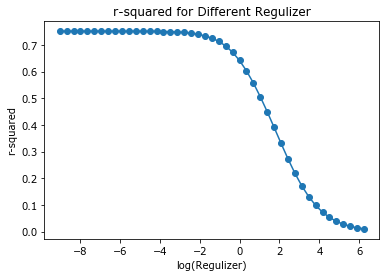

In [139]:
#plot r^2 of training data 
plt.plot(np.log(score_ridge.iloc[:,1]), score_ridge.iloc[:,0], marker='o')
plt.xlabel("log(Regulizer)")
plt.ylabel("r-squared")
plt.title("r-squared for Different Regulizer")

Text(0.5, 1.0, 'Error of Ridge Regression across different lambda')

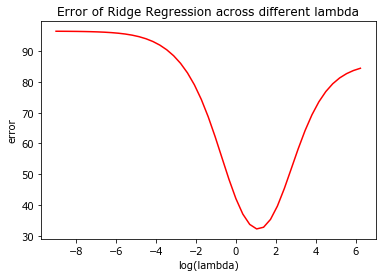

In [166]:
# Plot error of training data
ax = plt.gca()
ax.plot([np.log(x[0]) for x in error_df_ridge2],[x[1] for x in error_df_ridge2], 'r')
plt.xlabel('log(lambda)')
plt.ylabel('error')
plt.title('Error of Ridge Regression across different lambda')

## Boosting
### Adaptive Boosting

In [155]:
#fit many subsets of parametes for adaboost to see which is best subset
scores_ada = []
for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
    for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
        clf_a = AdaBoostRegressor(n_estimators=n, learning_rate=learning, random_state=0)
        scores_a = cross_val_score(clf_a, X_train, y_train.values.ravel(), cv=10)
        score = scores_a.mean()
#         clf_a.fit(X_train, y_train)
#         score = clf_a.score(X_test,y_test)
        scores_ada.append([score, learning, n])

In [156]:
#investigate fits through data and graphs 
scores_ada_df = pd.DataFrame(scores_ada)
scores_ada_df.columns = ['r_sq', 'learn_rate', 'n_estimators']
learn_avg = scores_ada_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','r_sq']]
n_avg = scores_ada_df.groupby('n_estimators', as_index=False).mean()[['n_estimators','r_sq']]
learn_n_avg = scores_ada_df.groupby(['learn_rate','n_estimators'], as_index=False).mean()[['learn_rate','n_estimators','r_sq']]

Text(0.5, 1.0, 'r-squared for Different Learning Rate')

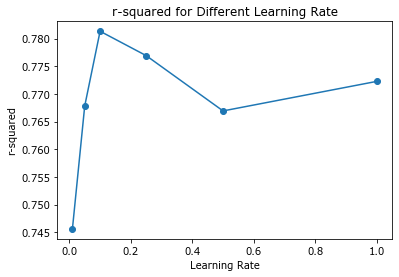

In [157]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("r-squared")
plt.title("r-squared for Different Learning Rate")

Text(0.5, 1.0, 'r-squared for Different Number of Estimators')

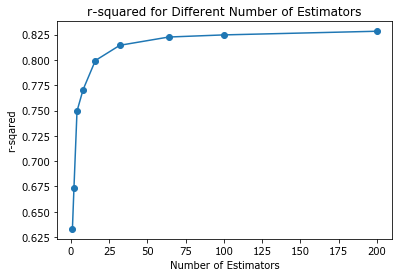

In [158]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("r-sqared")
plt.title("r-squared for Different Number of Estimators")

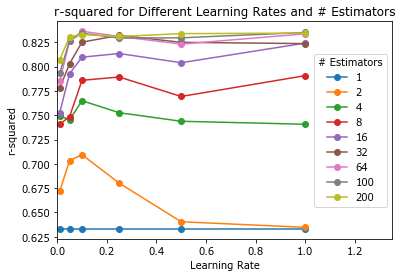

In [159]:
for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
    plt_data = learn_n_avg[learn_n_avg['n_estimators'] == n]
    plt.plot(plt_data.iloc[:,0], plt_data.iloc[:,2], marker='o', label=n)
plt.xlim(0,1.35)
plt.legend(loc='right', title = '# Estimators')
plt.xlabel("Learning Rate")
plt.ylabel("r-squared")
plt.title("r-squared for Different Learning Rates and # Estimators")
plt.show()

In [160]:
#Find parametes for best fit
max_r_sq = scores_ada_df['r_sq'].max()
best_fit = scores_ada_df.loc[scores_ada_df['r_sq'] == max_r_sq]
print(best_fit)

        r_sq  learn_rate  n_estimators
33  0.836394         0.1            64


In [161]:
#score best fit against test data
clf_a = AdaBoostRegressor(n_estimators=64, learning_rate=.01, random_state=0)
clf_a.fit(X_train, y_train)
score = clf_a.score(X_test,y_test)
score

0.7040134512408971

### Gradient Boosting

In [162]:
#fit different subsets of parameters to find the best subset
scores_grad = []
for depth in [1,2,3,4,5]:
    for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
        for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
            clf_g = GradientBoostingRegressor(n_estimators=n, learning_rate=learning, max_depth=depth, random_state=0)
            scores_g = cross_val_score(clf_g, X_train, y_train.values.ravel(), cv=10)
            score = np.absolute(scores_g).mean()
            scores_grad.append([score,depth, learning, n])
#             clf_g = GradientBoostingRegressor(n_estimators=n, learning_rate=learning, max_depth=depth, random_state=0)
#             clf_g.fit(X_train, y_train)
#             score = clf_g.score(X_test,y_test)
#             scores_grad.append([score,depth, learning, n])

In [163]:
scores_grad_df = pd.DataFrame(scores_grad)
scores_grad_df.columns = ['r_sq','depth', 'learn_rate', 'n_estimators']

depth_avg = scores_grad_df.groupby('depth', as_index=False).mean()[['depth','r_sq']]
learn_avg = scores_grad_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','r_sq']]
n_avg = scores_grad_df.groupby('n_estimators', as_index=False).mean()[['n_estimators','r_sq']]
learn_n_avg = scores_grad_df.groupby(['learn_rate','n_estimators'], as_index=False).mean()[['learn_rate','n_estimators','r_sq']]

In [164]:
#investigate scores through data and graphs 
print(depth_avg)
print(learn_avg)
print(n_avg)

   depth      r_sq
0      1  0.530332
1      2  0.607151
2      3  0.612438
3      4  0.629438
4      5  0.626000
   learn_rate      r_sq
0        0.01  0.290273
1        0.05  0.514363
2        0.10  0.607701
3        0.25  0.719047
4        0.50  0.768507
5        1.00  0.706540
   n_estimators      r_sq
0             1  0.260727
1             2  0.362127
2             4  0.469077
3             8  0.563972
4            16  0.649315
5            32  0.717374
6            64  0.769367
7           100  0.795672
8           200  0.822014


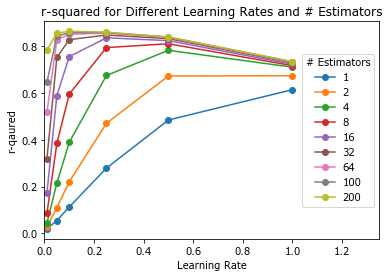

In [165]:
for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
    plt_data = learn_n_avg[learn_n_avg['n_estimators'] == n]
    plt.plot(plt_data.iloc[:,0], plt_data.iloc[:,2], marker='o', label=n)
plt.xlim(0,1.35)
plt.legend(loc='right', title = '# Estimators')
plt.xlabel("Learning Rate")
plt.ylabel("r-qaured")
plt.title("r-squared for Different Learning Rates and # Estimators")
plt.show()

Text(0.5, 1.0, 'r-squared for Different Tree Depths')

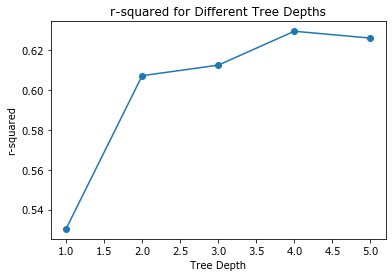

In [64]:
plt.plot(depth_avg.iloc[:,0], depth_avg.iloc[:,1], marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("r-squared")
plt.title("r-squared for Different Tree Depths")

Text(0.5, 1.0, 'r-squared for Different Learning Rate')

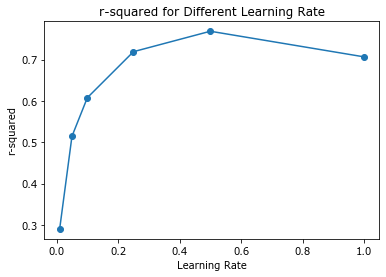

In [61]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("r-squared")
plt.title("r-squared for Different Learning Rate")

Text(0.5, 1.0, 'r-squared for Different Number of Estimators')

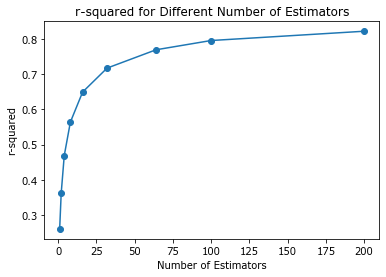

In [67]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("r-squared")
plt.title("r-squared for Different Number of Estimators")

In [50]:
# Find parameters for best fit
max_r_sq = scores_grad_df['r_sq'].max()
best_fit = scores_grad_df.loc[scores_grad_df['r_sq'] == max_r_sq]
print(best_fit)

         r_sq  depth  learn_rate  n_estimatores
143  0.886133      3         0.1            200


In [51]:
#Score best model against test data
clf_g = GradientBoostingRegressor(n_estimators=200, learning_rate=.1, max_depth=3, random_state=0)
clf_g.fit(X_train, y_train)
score = clf_g.score(X_test,y_test)
score

0.8125934572759475